# Yandex Data Science School
## Linear Regression & Regularization Exercise.


## Outline
In this exercise you will learn the following topics:

1. Refresher on how linear regression is solved in batch and in Gradient Descent 
2. Implementation of Ridge Regression
3. Comparing Ridge, Lasso and vanila Linear Regression on a dataset

# Git Exercise
In this exercise you will also experience working with github.

You might need to install local python enviroment.
Installation Instruction for ex2 - working on a local python environment:
https://docs.google.com/document/d/1G0rBo36ff_9JzKy0EkCalK4m_ThNUuJ2bRz463EHK9I

## please add the github link of your work below:


example: https://github.com/username/exercise_name

## Refresher on Ordinary Least Square (OLS) aka Linear Regeression

### Lecture Note

In Matrix notation, the matrix $X$ is of dimensions $n \times p$ where each row is an example and each column is a feature dimension. 

Similarily, $y$ is of dimension $n \times 1$ and $w$ is of dimensions $p \times 1$.

The model is $\hat{y}=X\cdot w$ where we assume for simplicity that $X$'s first columns equals to 1 (one padding), to account for the bias term.

Our objective is to optimize the loss $L$ defines as resiudal sum of squares (RSS): 

$L_{RSS}=\frac{1}{N}\left\Vert Xw-y \right\Vert^2$ (notice that in matrix notation this means summing over all examples, so $L$ is scalar.)

To find the optimal $w$ one needs to derive the loss with respect to $w$.

$\frac{\partial{L_{RSS}}}{\partial{w}}=\frac{2}{N}X^T(Xw-y)$ (to see why, read about [matrix derivatives](http://www.gatsby.ucl.ac.uk/teaching/courses/sntn/sntn-2017/resources/Matrix_derivatives_cribsheet.pdf) or see class notes )

Thus, the gardient descent solution is $w'=w-\alpha \frac{2}{N}X^T(Xw-y)$.

Solving $\frac{\partial{L_{RSS}}}{\partial{w}}=0$ for $w$ one can also get analytical solution:

$w_{OLS}=(X^TX)^{-1}X^Ty$

The first term, $(X^TX)^{-1}X^T$ is also called the pseudo inverse of $X$.

See [lecture note from Stanford](https://web.stanford.edu/~mrosenfe/soc_meth_proj3/matrix_OLS_NYU_notes.pdf) for more details.


## Exercise 1 - Ordinary Least Square
* Get the boston housing dataset by using the scikit-learn package. hint: [load_boston](http://scikit-learn.org/stable/modules/generated/sklearn.datasets.load_boston.html)

* What is $p$? what is $n$ in the above notation? hint: [shape](https://docs.scipy.org/doc/numpy-1.15.0/reference/generated/numpy.ndarray.shape.html)

* write a model `OrdinaryLinearRegression` which has a propoery $w$ and 3 methods: `fit`, `predict` and `score` (which returns the MSE on a given sample set). Hint: use [numpy.linalg.pinv](https://docs.scipy.org/doc/numpy-1.15.1/reference/generated/numpy.linalg.pinv.html) to be more efficient.

* Fit the model. What is the training MSE?

* Plot a scatter plot where on x-axis plot $Y$ and in the y-axis $\hat{Y}_{OLS}$

* Split the data to 75% train and 25% test 20 times. What is the average MSE now for train and test? Hint: use [train_test_split](http://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html) or [ShuffleSplit](http://scikit-learn.org/stable/modules/generated/sklearn.model_selection.ShuffleSplit.html).

* Use a t-test to proove that the MSE for training is significantly smaller than for testing. What is the p-value? Hint: use [scipy.stats.ttest_rel](https://docs.scipy.org/doc/scipy-0.14.0/reference/generated/scipy.stats.ttest_rel.html). 

* Write a new class `OrdinaryLinearRegressionGradientDescent` which inherits from `OrdinaryLinearRegression` and solves the problem using gradinet descent. The class should get as a parameter the learning rate and number of iteration. Plot the class convergance. What is the effect of learning rate? How would you find number of iteration automatically? Note: Gradient Descent does not work well when features are not scaled evenly (why?!). Be sure to normalize your features first.

* The following parameters are optional (not mandatory to use):
    * early_stop - True / False boolean to indicate to stop running when loss stops decaying and False to continue.
    * verbose- True/False boolean to turn on / off logging, e.g. print details like iteration number and loss (https://en.wikipedia.org/wiki/Verbose_mode)
    * track_loss - True / False boolean when to save loss results to present later in learning curve graphs

In [87]:
import warnings
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt 
from sklearn.linear_model import LinearRegression 
from sklearn.model_selection import train_test_split 
from sklearn import datasets
%matplotlib inline 
warnings.warn("ignore")



/var/folders/3q/9n9mn_1x03zcn6303bs2v4h40000gn/T/ipykernel_40542/938066907.py:9: UserWarning: ignore
  warnings.warn("ignore")


In [88]:
# * write a model `Ols` which has a propoery $w$ and 3 methods: `fit`, `predict` and `score`.? hint: use [numpy.linalg.pinv](https://docs.scipy.org/doc/numpy-1.15.1/reference/generated/numpy.linalg.pinv.html) to be more efficient.
class Ols(object):
  def __init__(self):
    self.w = None
    
  @staticmethod
  def pad(X):
      pass
    
  def fit(self, X, Y):
    W_ols = np.linalg.pinv(X.T @ X) @ X.T @ Y
    self.w = W_ols
    return self
  
  def predict(self, X):
    y = X @ self.w
    return y
    
  def score(self, Y, Y_pred):
    #MSE 
    return np.mean((Y - Y_pred)**2)
  
  def r_2(self, Y, Y_pred):
    #R2
    return 1 - np.mean((Y - Y_pred)**2)/np.var(Y)

The training MSE is:  24.166099330126492


/Users/linoy/anaconda3/lib/python3.8/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function load_boston is deprecated; `load_boston` is deprecated in 1.0 and will be removed in 1.2.

    The Boston housing prices dataset has an ethical problem. You can refer to
    the documentation of this function for further details.

    The scikit-learn maintainers therefore strongly discourage the use of this
    dataset unless the purpose of the code is to study and educate about
    ethical issues in data science and machine learning.

    In this special case, you can fetch the dataset from the original
    source::

        import pandas as pd
        import numpy as np


        data_url = "http://lib.stat.cmu.edu/datasets/boston"
        raw_df = pd.read_csv(data_url, sep="\s+", skiprows=22, header=None)
        data = np.hstack([raw_df.values[::2, :], raw_df.values[1::2, :2]])
        target = raw_df.values[1::2, 2]

    Alternative datasets include the California housing d

Text(0, 0.5, 'Predicted')

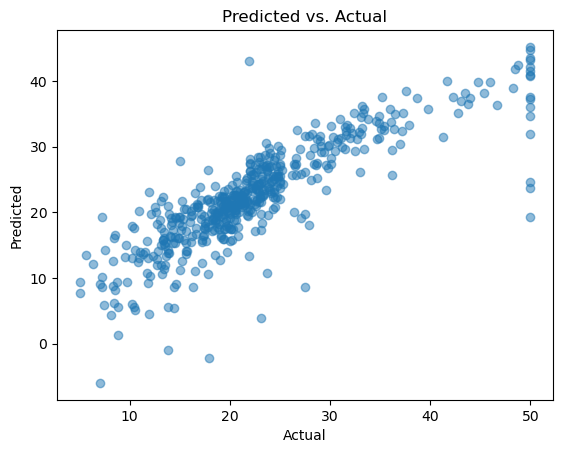

In [89]:
boston = datasets.load_boston()
x, y = boston.data, boston.target

#n is the number of samples n = x.shape[0] 
#P is the number of features p = x.shape[1] 

model_ols = Ols()
model = model_ols.fit(x,y) 
Train_MSE = model_ols.score(y, model.predict(x))
print("The training MSE is: ", Train_MSE)

results = model.predict(x)
plt.scatter(y, results, alpha=0.5)
plt.title("Predicted vs. Actual")
plt.xlabel("Actual")
plt.ylabel("Predicted")



In [91]:
# Split the data to 75% train and 25% test 20 times. What is the average MSE now for train and test?  

from sklearn.model_selection import train_test_split 
from sklearn.model_selection import ShuffleSplit 

Shuffle = ShuffleSplit(n_splits=20, test_size=0.25, random_state=0) 
error_train = []
error_test = [] 
iteration = 0

for train_index, test_index in Shuffle.split(x):
    x_train, x_test = x[train_index], x[test_index]
    y_train, y_test = y[train_index], y[test_index]
    model = model_ols.fit(x_train, y_train)
    error_train.append(model.score(y_train, model.predict(x_train)))
    error_test.append(model.score(y_test, model.predict(x_test)))
    print("Iteration: ", iteration, "Train MSE: ", error_train[iteration], "Test MSE: ", error_test[iteration])
    iteration += 1
    
    
print("The average MSE for train is: ", np.mean(error_train)) 
print("The average MSE for test is: ", np.mean(error_test))

Iteration:  0 Train MSE:  21.913746548515434 Test MSE:  32.74241951087772
Iteration:  1 Train MSE:  20.346477553725485 Test MSE:  37.14196576876151
Iteration:  2 Train MSE:  22.665462995418345 Test MSE:  29.182831509954053
Iteration:  3 Train MSE:  24.805079302851325 Test MSE:  23.81111050861486
Iteration:  4 Train MSE:  24.537437711517484 Test MSE:  23.707488105816722
Iteration:  5 Train MSE:  24.934926057992737 Test MSE:  23.797741733326596
Iteration:  6 Train MSE:  25.042085765645346 Test MSE:  25.036201564028197
Iteration:  7 Train MSE:  25.453848717096974 Test MSE:  20.934654286052638
Iteration:  8 Train MSE:  24.190519259186846 Test MSE:  25.24490798871167
Iteration:  9 Train MSE:  21.79589808220554 Test MSE:  33.3478103714234
Iteration:  10 Train MSE:  25.50449527570097 Test MSE:  21.11988611588401
Iteration:  11 Train MSE:  23.258143022935624 Test MSE:  28.09596319855397
Iteration:  12 Train MSE:  25.627355156893255 Test MSE:  20.672668591915535
Iteration:  13 Train MSE:  24.05

In [92]:
from scipy.stats import ttest_rel 

print("The p-value is: ", ttest_rel(error_train, error_test)[1]) #The P-value is very big (0.66) so we can't reject the null hypothesis. Meaning that the error_train is significantly smaller from error_test.
print("The t-statistic is: ", ttest_rel(error_train, error_test)[0]) 
print("The difference between the two MSE is: ", np.mean(error_test) - np.mean(error_train))

The p-value is:  0.6655615391687966
The t-statistic is:  -0.43907261746597437
The difference between the two MSE is:  0.7383902138173575


In [2]:
# Write a new class OlsGd which solves the problem using gradinet descent. 
# The class should get as a parameter the learning rate and number of iteration. 
# Plot the loss convergance. for each alpha, learning rate plot the MSE with respect to number of iterations.
# What is the effect of learning rate? 
# How would you find number of iteration automatically? 
# Note: Gradient Descent does not work well when features are not scaled evenly (why?!). Be sure to normalize your feature first.
class Normalizer():
  def __init__(self):
    self.mean = None
    self.std = None

  def fit(self, X):
    self.mean = np.mean(X, axis=0)
    self.std = np.std(X, axis=0)
    return self
  
  def predict(self, X):
    return (X - self.mean)/self.std
    
class OlsGd(Ols):
  
  def __init__(self, learning_rate=.05, num_iteration=1000, normalize=True, early_stop=True, verbose=True):
    super(OlsGd, self).__init__()
    self.learning_rate = learning_rate
    self.num_iteration = num_iteration
    self.early_stop = early_stop
    self.normalize = normalize
    self.normalizer = Normalizer()    
    self.verbose = verbose
    
  def _fit(self, X, Y, reset=True, track_loss=True):
    #remeber to normalize the data before starting
    pass
        
  def _predict(self, X):
    #remeber to normalize the data before starting
    pass
      
  def _step(self, X, Y):
    # use w update for gradient descent
    pass

## Exercise 2 - Ridge Linear Regression

Recall that ridge regression is identical to OLS but with a L2 penalty over the weights:

$L(y,\hat{y})=\sum_{i=1}^{i=N}{(y^{(i)}-\hat{y}^{(i)})^2} + \lambda \left\Vert w \right\Vert_2^2$

where $y^{(i)}$ is the **true** value and $\hat{y}^{(i)}$ is the **predicted** value of the $i_{th}$ example, and $N$ is the number of examples

* Show, by differentiating the above loss, that the analytical solution is $w_{Ridge}=(X^TX+\lambda I)^{-1}X^Ty$
* Change `OrdinaryLinearRegression` and `OrdinaryLinearRegressionGradientDescent` classes to work also for ridge regression (do not use the random noise analogy but use the analytical derivation). Either add a parameter, or use inheritance.
* **Bonus: Noise as a regularizer**: Show that OLS (ordinary least square), if one adds multiplicative noise to the features the **average** solution for $W$ is equivalent to Ridge regression. In other words, if $X'= X*G$ where $G$ is an uncorrelated noise with variance $\sigma$ and mean 1, then solving for $X'$ with OLS is like solving Ridge for $X$. What is the interpretation? 



In [ ]:
class RidgeLs(Ols):
  def __init__(self, ridge_lambda, *wargs, **kwargs):
    super(RidgeLs,self).__init__(*wargs, **kwargs)
    self.ridge_lambda = ridge_lambda
    
  def _fit(self, X, Y):
    #Closed form of ridge regression
    pass

### Use scikitlearn implementation for OLS, Ridge and Lasso